In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
path = '/Users/kanoumotoharu/Downloads/m5-forecasting-accuracy/'

In [4]:
os.listdir(path)

['calendar.csv',
 'sell_prices.csv',
 'sales_train_validation.csv',
 'sample_submission.csv']

In [8]:
%%time
train_df = pd.read_csv(path+'sales_train_validation.csv')
calendar_df = pd.read_csv(path+'calendar.csv')
sell_prices_df = pd.read_csv(path+'sell_prices.csv')
sample_submission_df = pd.read_csv(path+'sample_submission.csv')

CPU times: user 12 s, sys: 1.22 s, total: 13.2 s
Wall time: 13.3 s


In [9]:
train_df.head()

id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  d_1  d_2  d_3  d_4   ...    d_1904  d_1905  d_1906  d_1907  \
0       CA    0    0    0    0   ...         1       3       0       1   
1       CA    0    0    0    0   ...         0       0       0       0   
2       CA    0    0    0    0   ...         2       1       2       1   
3       CA    0    0    0    0   ...         1       0       5       4   
4       CA    0    0    0    0   ...         2       1       1       0   

   d_1908  d_1909  d_1910  d_1911  d_1912  d_1913  
0       1       1       3       0       1       1  
1       0       1       0       0       0       0  
2       1       1       0       1       1       1  
3       1       0       1       3       7       2  
4       1       1       2       2       2       4  

[5 rows x 1919 columns]

In [10]:
calendar_df.head()

date  wm_yr_wk    weekday  wday  month  year    d event_name_1  \
0  2011-01-29     11101   Saturday     1      1  2011  d_1          NaN   
1  2011-01-30     11101     Sunday     2      1  2011  d_2          NaN   
2  2011-01-31     11101     Monday     3      1  2011  d_3          NaN   
3  2011-02-01     11101    Tuesday     4      2  2011  d_4          NaN   
4  2011-02-02     11101  Wednesday     5      2  2011  d_5          NaN   

  event_type_1 event_name_2 event_type_2  snap_CA  snap_TX  snap_WI  
0          NaN          NaN          NaN        0        0        0  
1          NaN          NaN          NaN        0        0        0  
2          NaN          NaN          NaN        0        0        0  
3          NaN          NaN          NaN        1        1        0  
4          NaN          NaN          NaN        1        0        1

In [11]:
sell_prices_df.head()

store_id        item_id  wm_yr_wk  sell_price
0     CA_1  HOBBIES_1_001     11325        9.58
1     CA_1  HOBBIES_1_001     11326        9.58
2     CA_1  HOBBIES_1_001     11327        8.26
3     CA_1  HOBBIES_1_001     11328        8.26
4     CA_1  HOBBIES_1_001     11329        8.26

In [12]:
d_cols = [f'd_{i}' for i in range(1,1914)]

In [26]:
data = train_df.set_index('id')[d_cols].T
data.reset_index(drop=True, inplace=True)

In [27]:
calendar_df.date = pd.to_datetime(calendar_df.date)

In [28]:
calendar_df2 = calendar_df[:1913]

In [29]:
data = pd.concat([
    calendar_df2[['date', 'weekday']],
    data
],axis=1)

In [35]:
cols = data.columns[2:].tolist()

In [41]:
gweek_data = data.groupby(['weekday'])[cols].mean()

In [44]:
gweek_data = gweek_data.loc[['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday'], :]

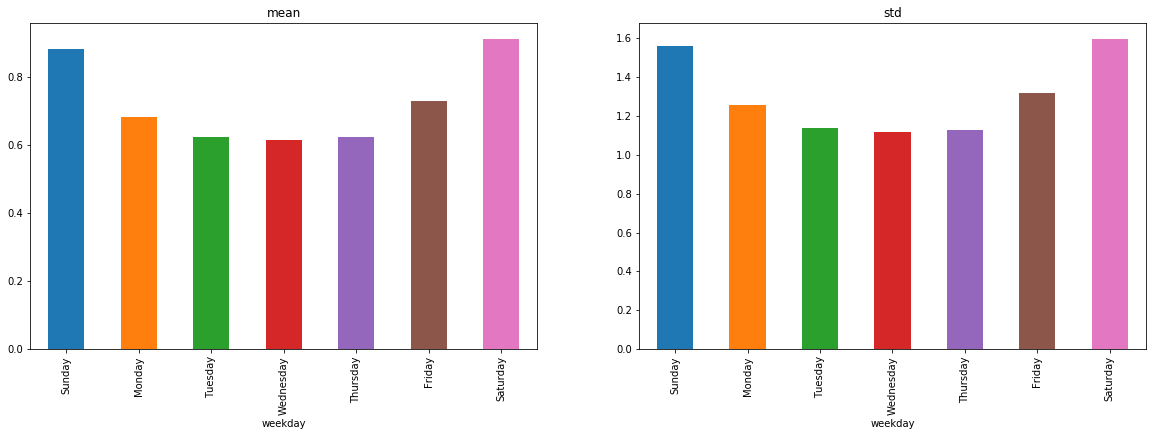

In [59]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
gweek_data.iloc[:,gweek_data.columns.str.contains('HOBBIES')].mean(axis=1).plot('bar')
plt.title('mean')
plt.subplot(1,2,2)
gweek_data.iloc[:,gweek_data.columns.str.contains('HOBBIES')].std(axis=1).plot('bar')
plt.title('std')
plt.show()

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
gweek_data.iloc[:,gweek_data.columns.str.contains('FOOD')].mean(axis=1).plot('bar')
plt.title('mean')
plt.subplot(1,2,2)
gweek_data.iloc[:,gweek_data.columns.str.contains('FOOD')].std(axis=1).plot('bar')
plt.title('std')
plt.show()

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
gweek_data.iloc[:,gweek_data.columns.str.contains('HOUSE')].mean(axis=1).plot('bar')
plt.title('mean')
plt.subplot(1,2,2)
gweek_data.iloc[:,gweek_data.columns.str.contains('HOUSE')].std(axis=1).plot('bar')
plt.title('std')
plt.show()

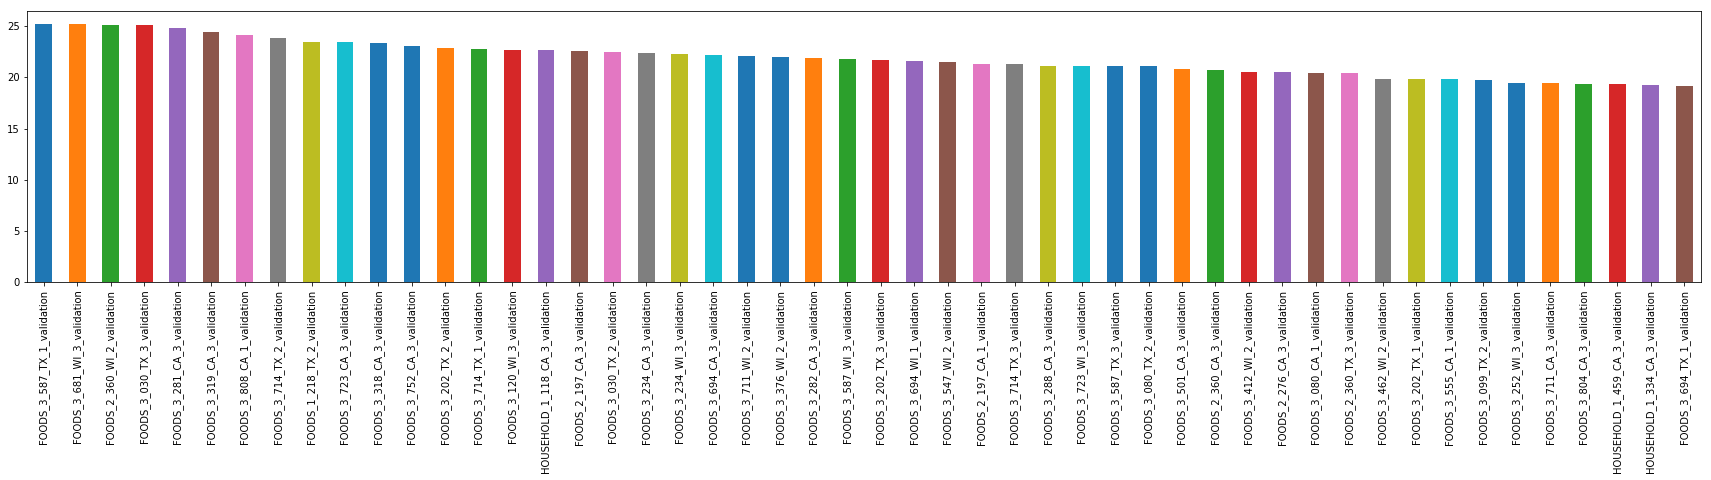

In [74]:
plt.figure(figsize=(30,5))
data[cols].mean(axis=0).sort_values(ascending=False)[:50].plot('bar')
plt.show()
plt.figure(figsize=(30,5))
data[cols].mean(axis=0).sort_values(ascending=False)[50:100].plot('bar')
plt.show()

In [101]:
splitnum=10
a = int(1913/splitnum)+1

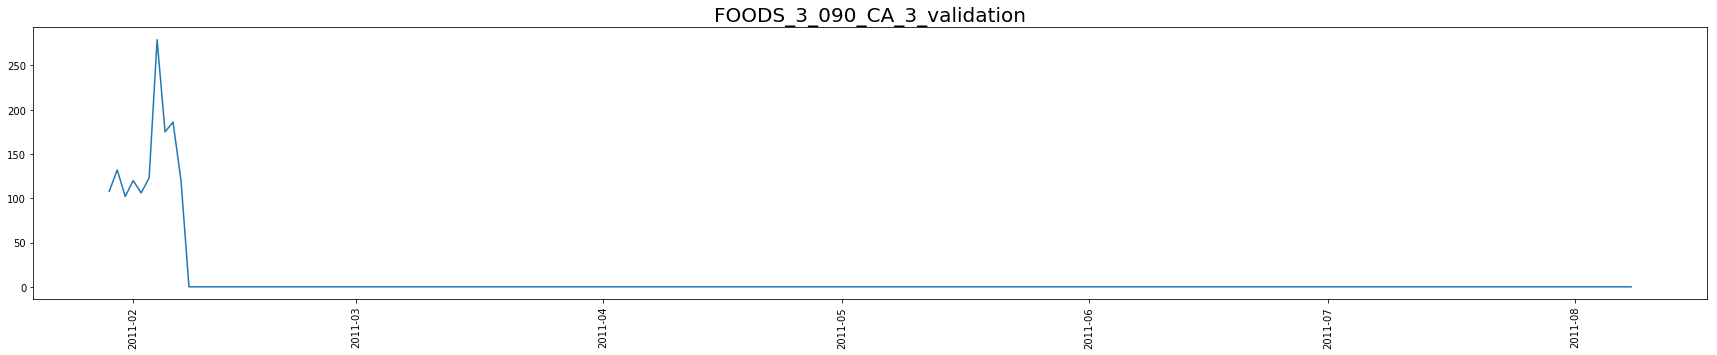

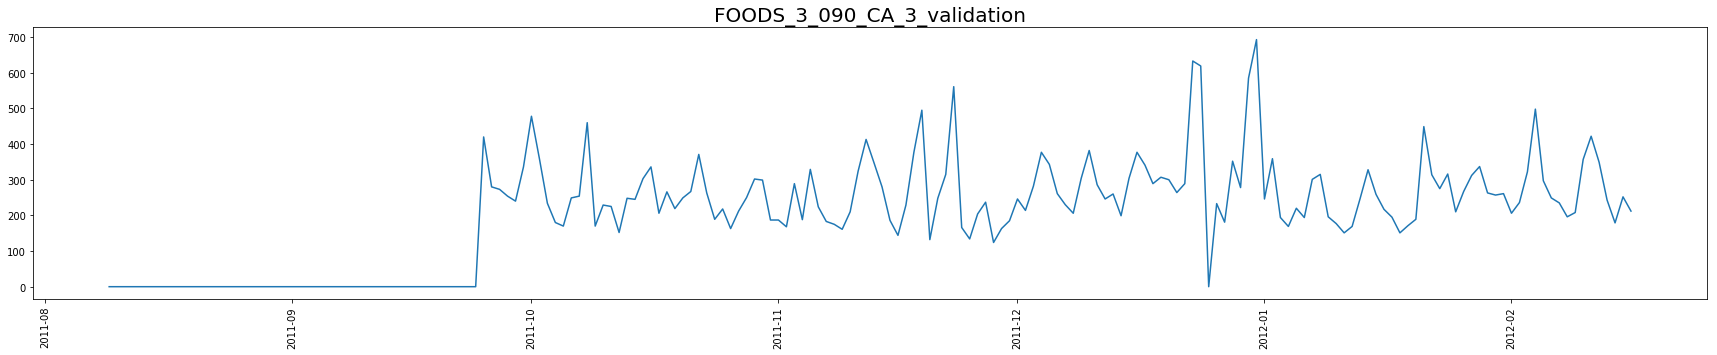

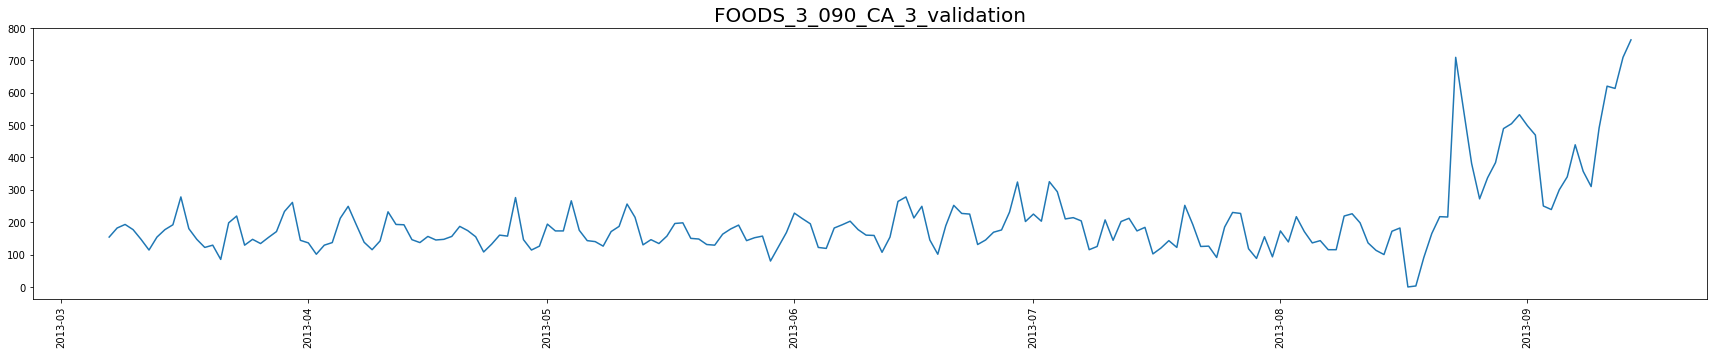

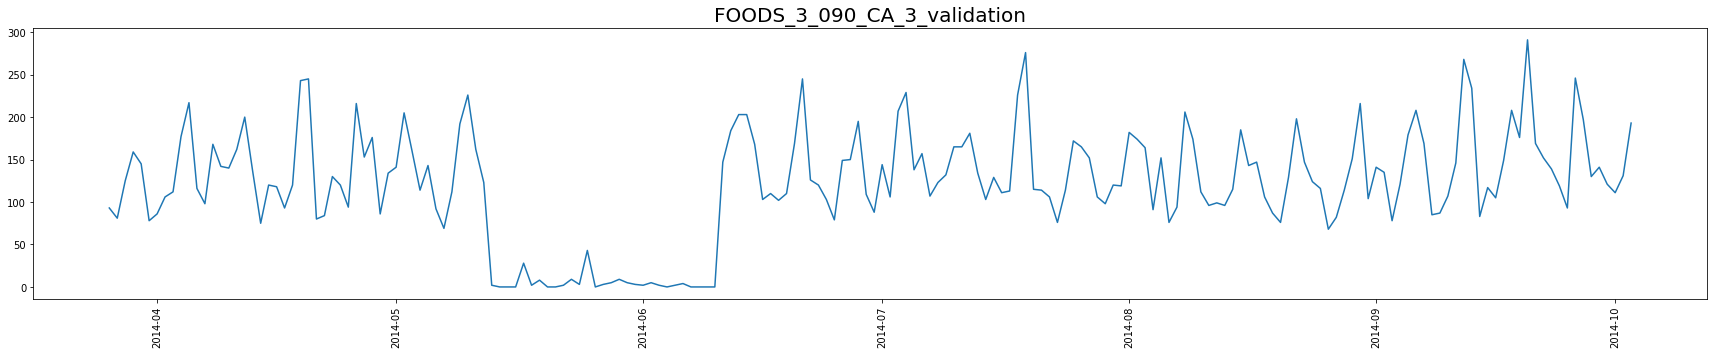

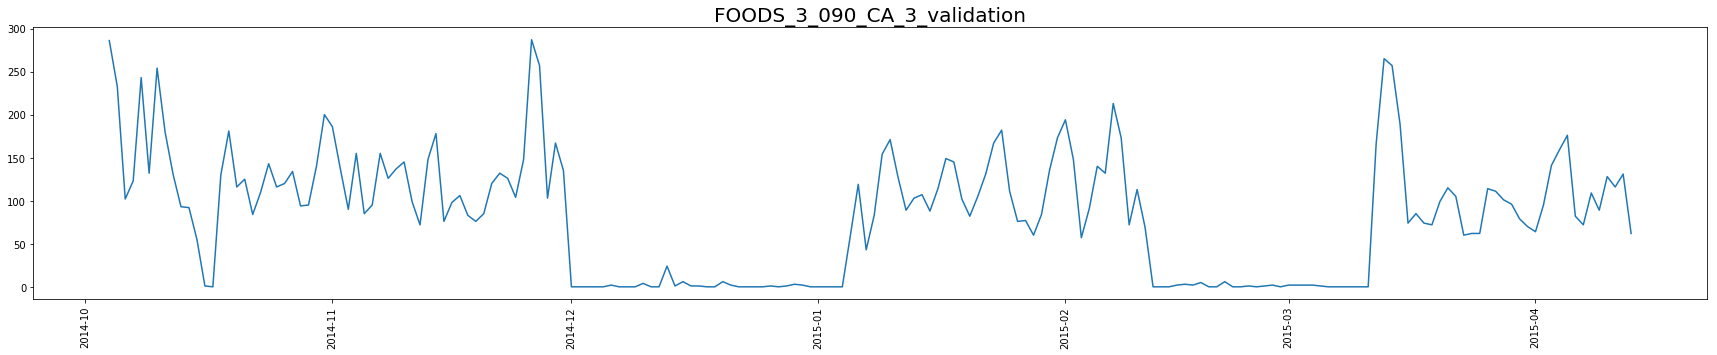

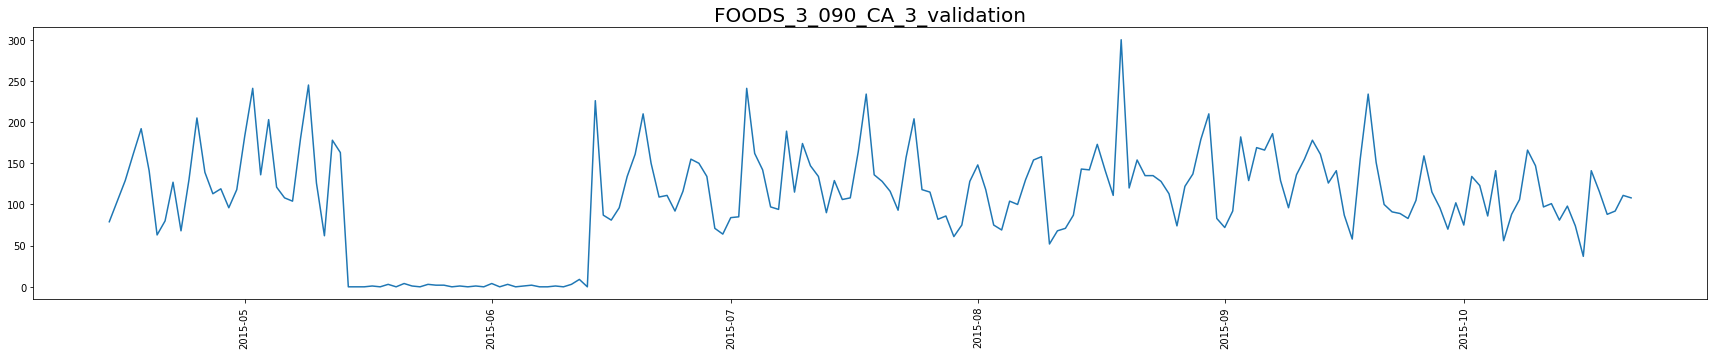

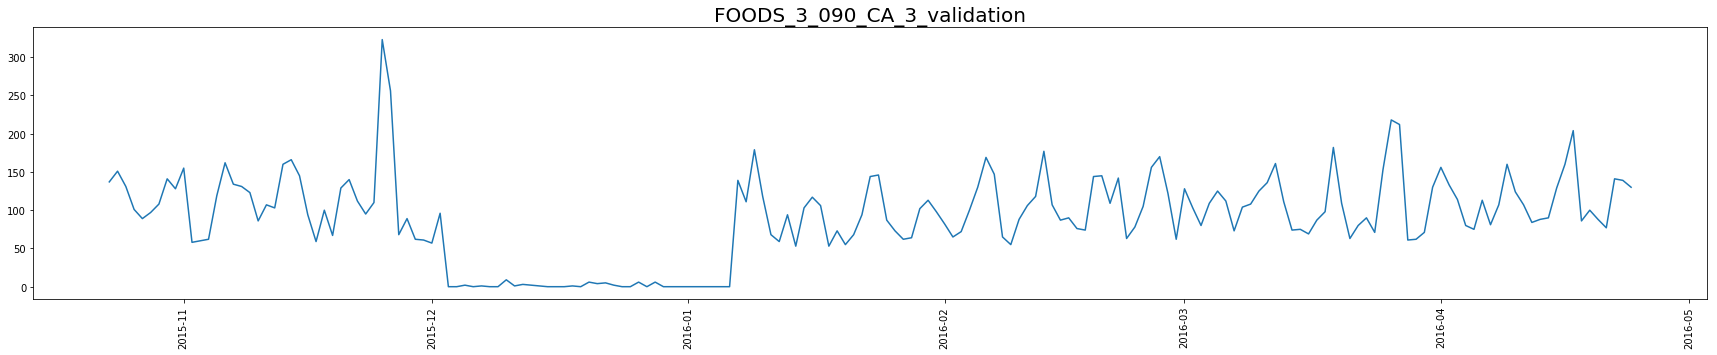

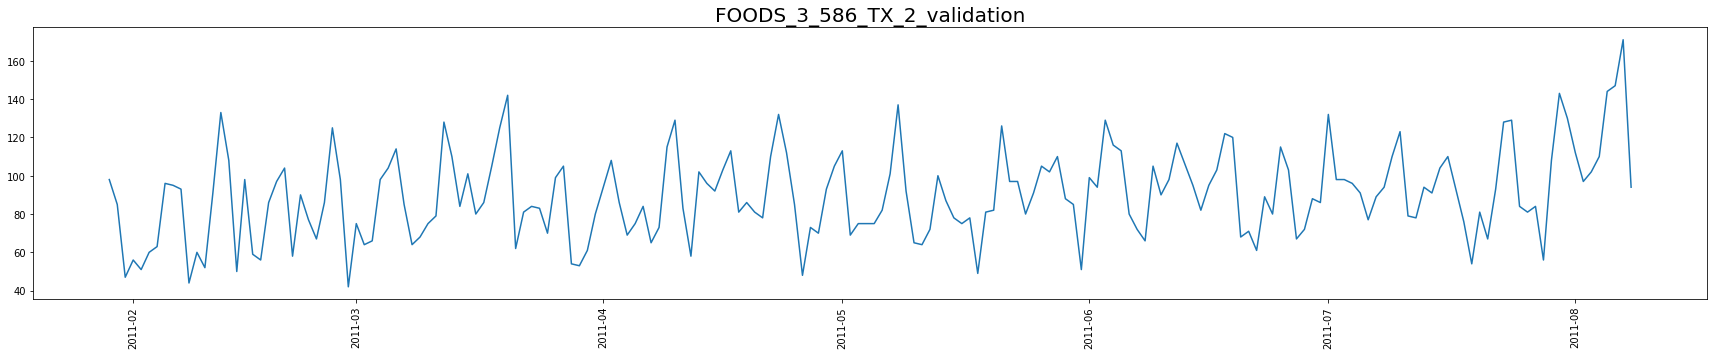

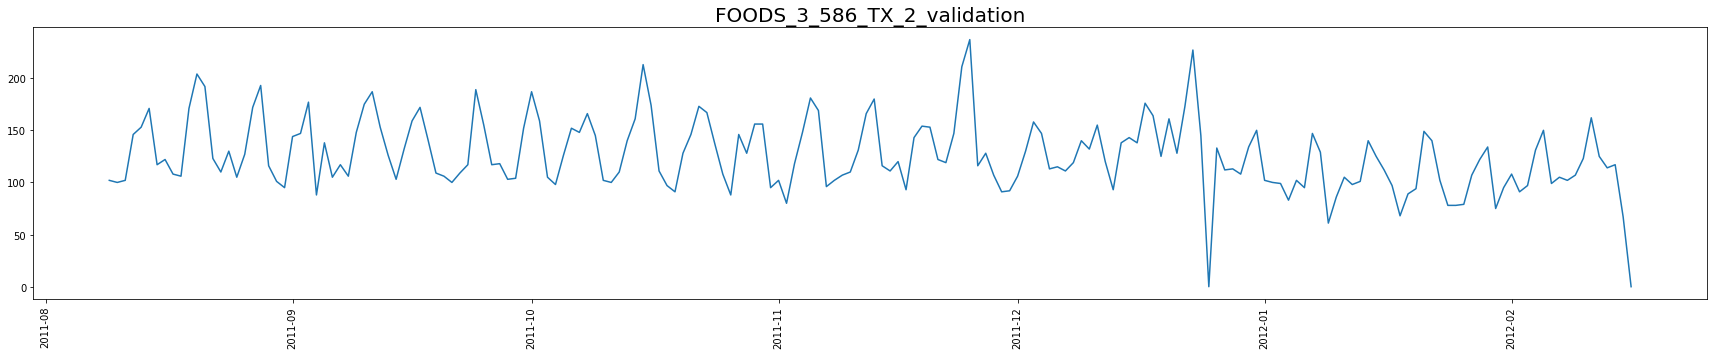

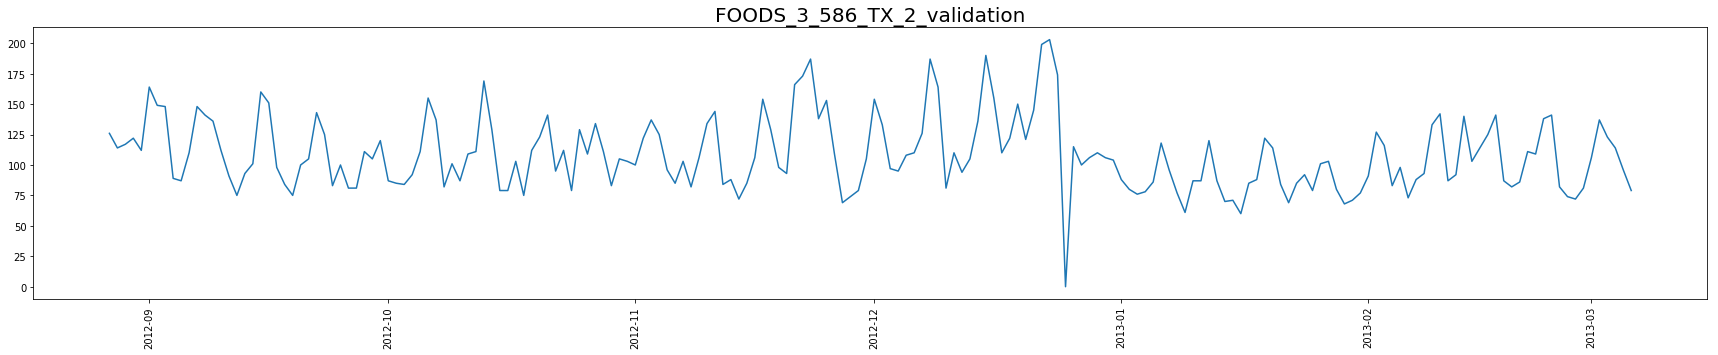

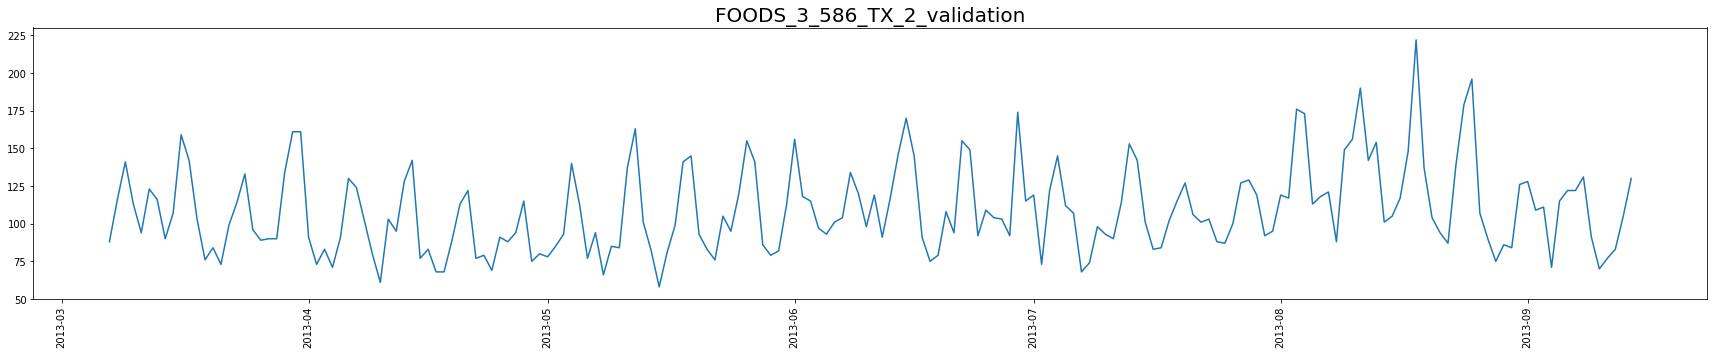

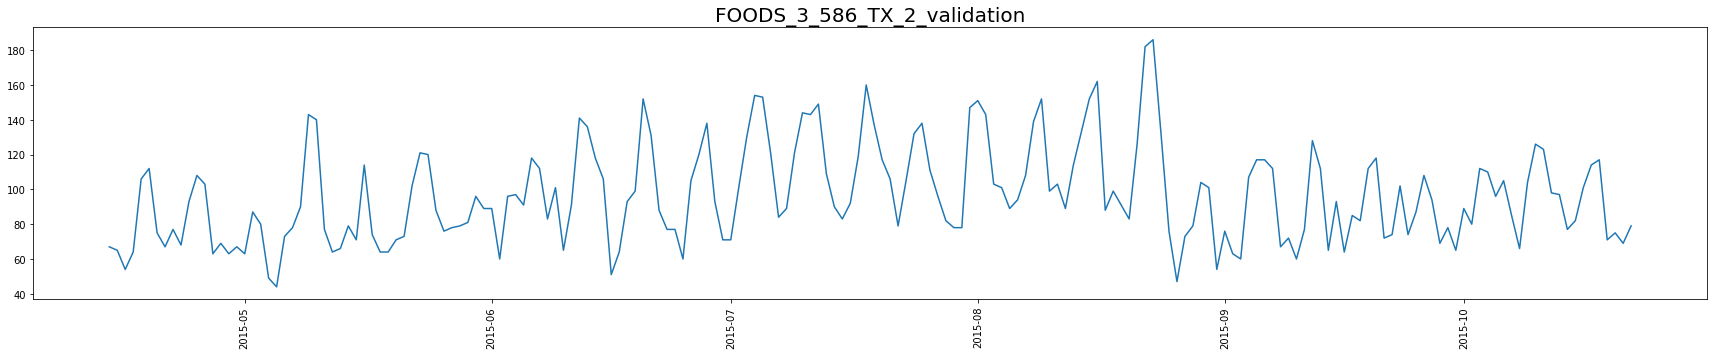

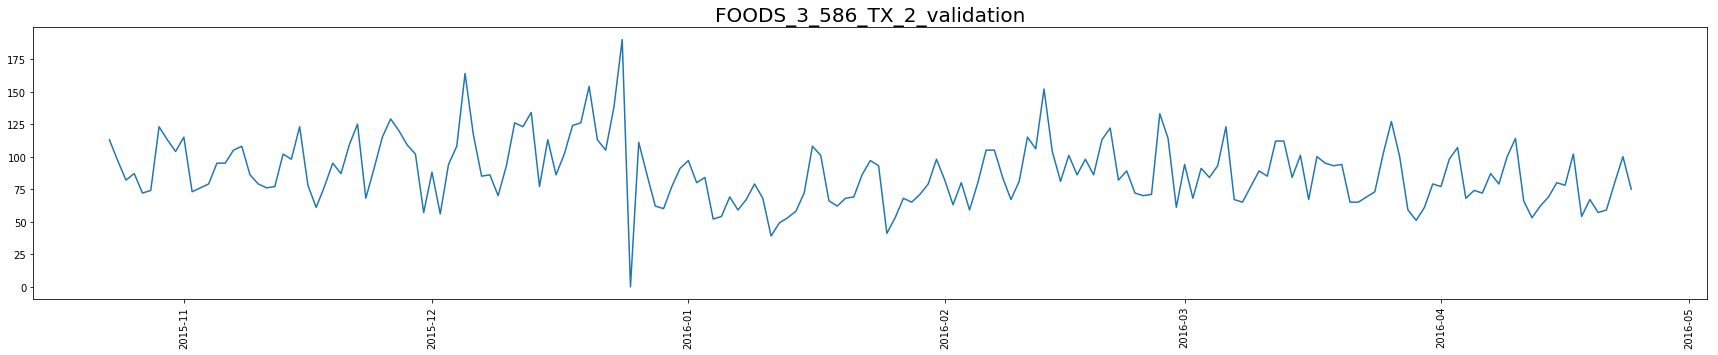

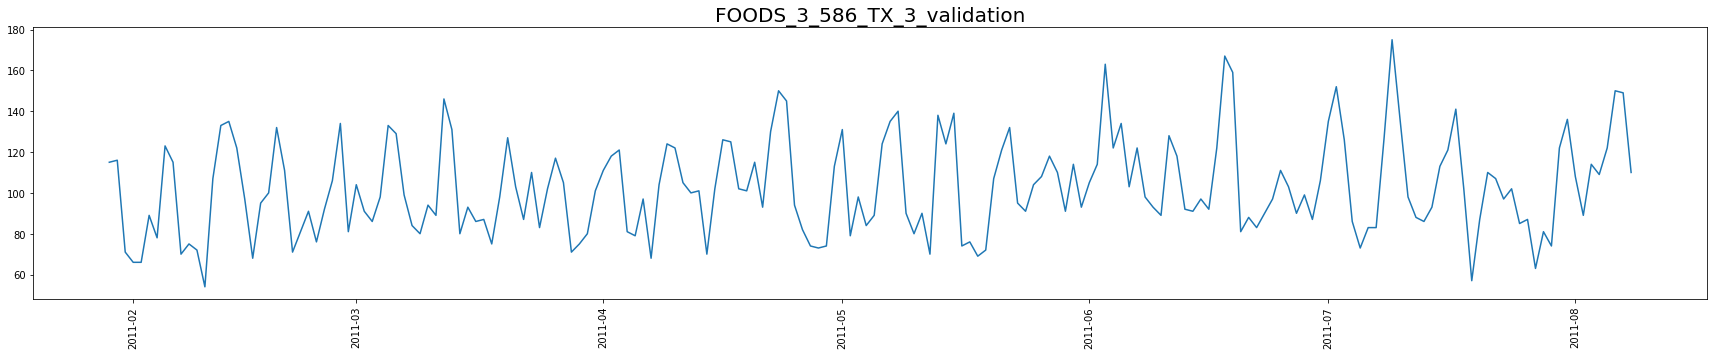

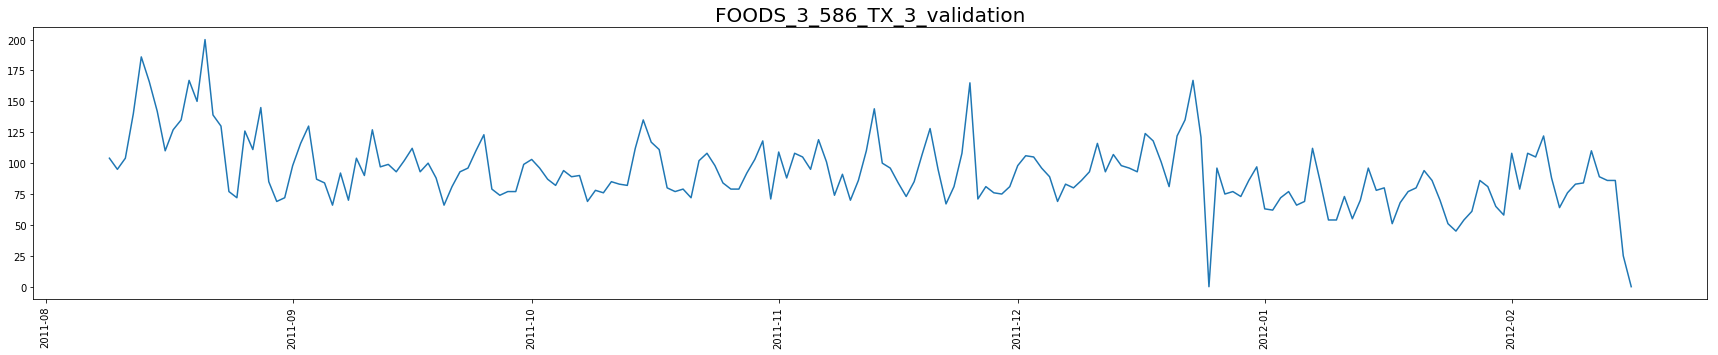

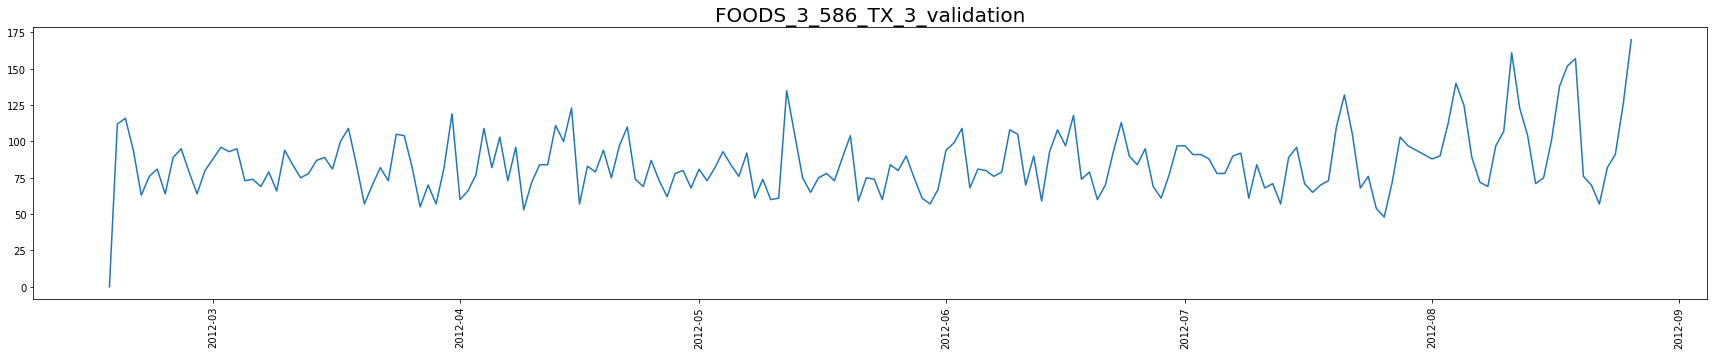

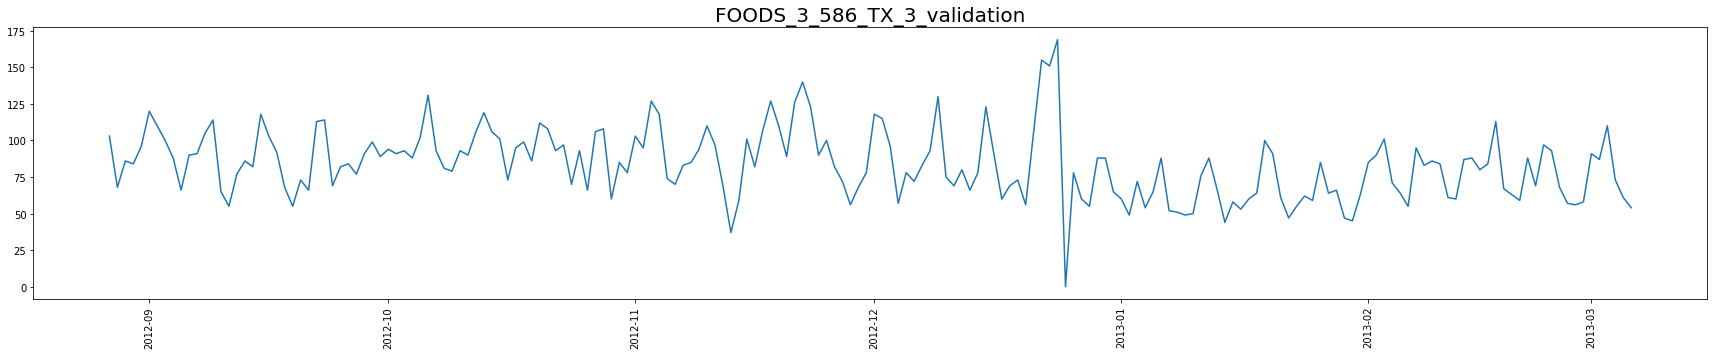

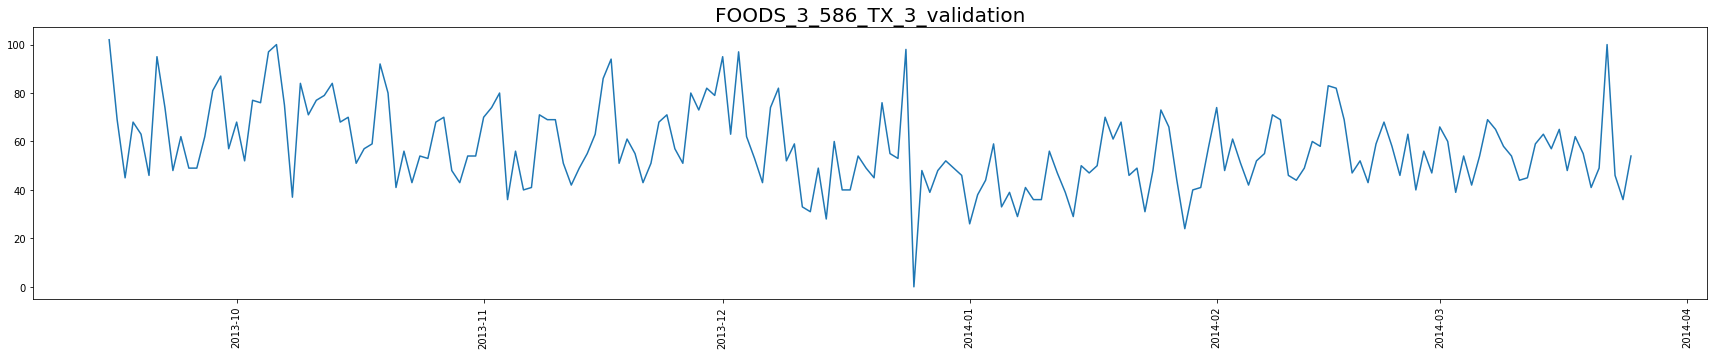

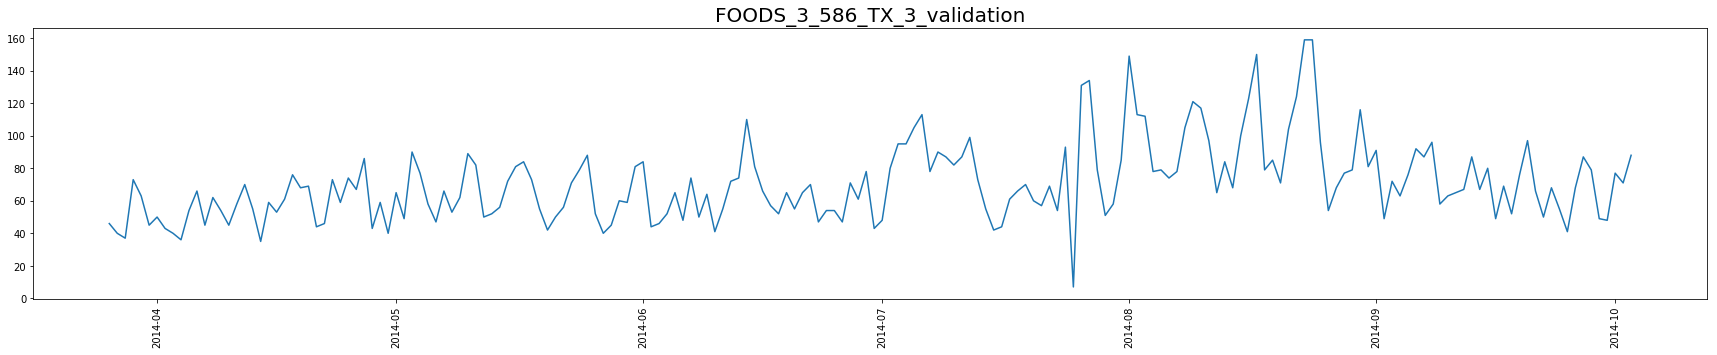

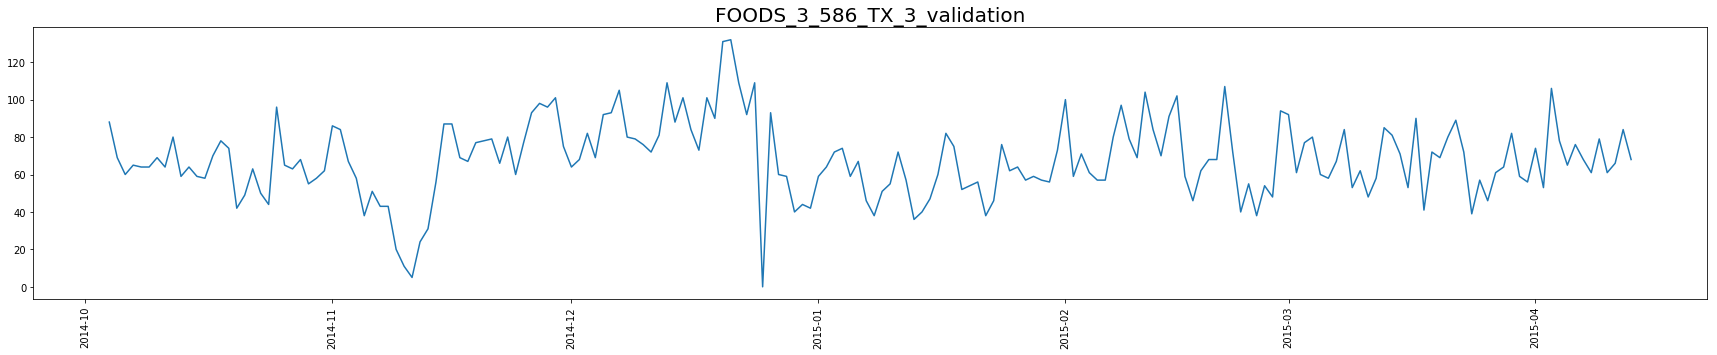

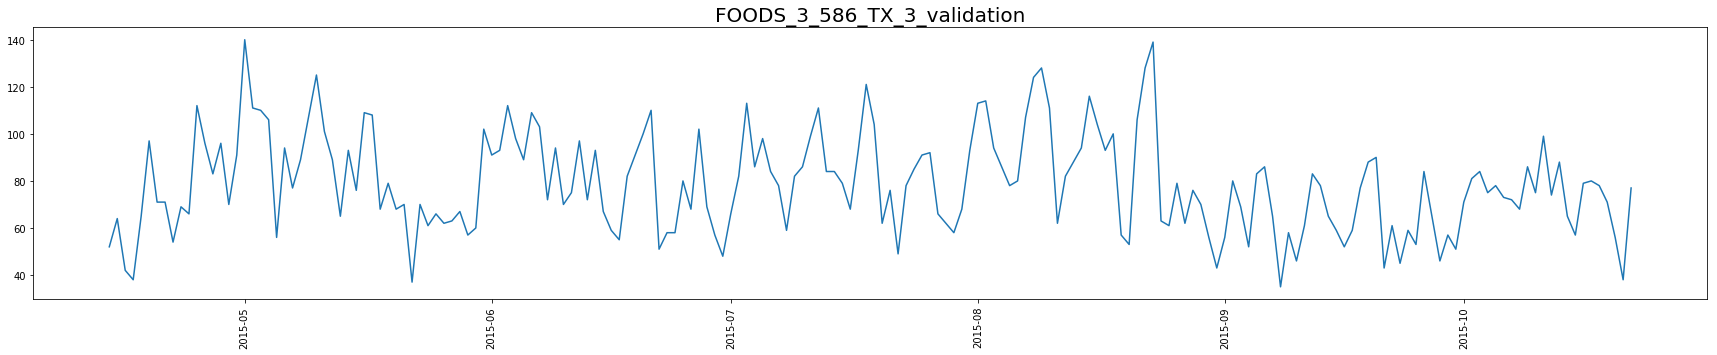

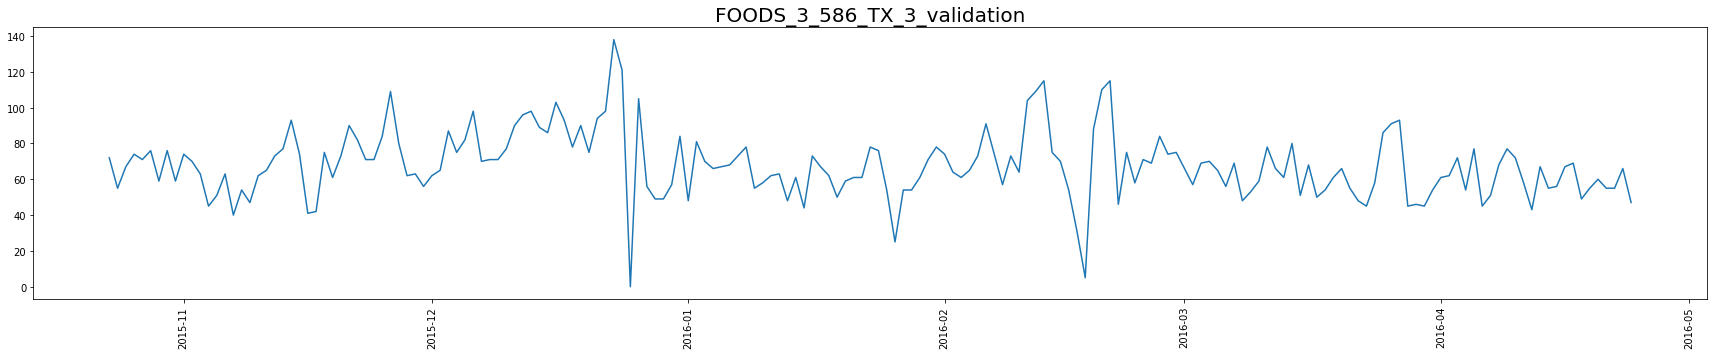

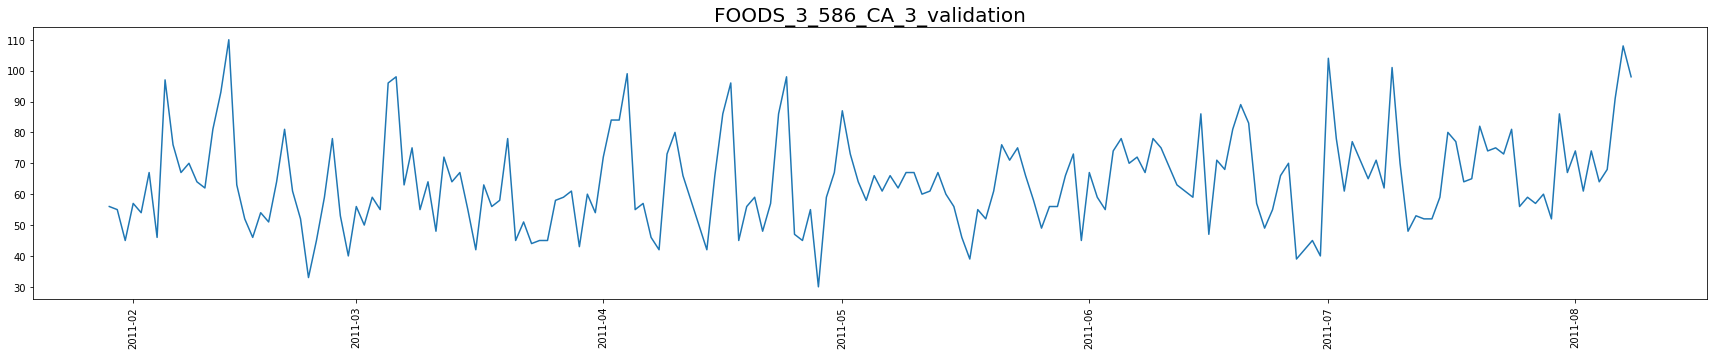

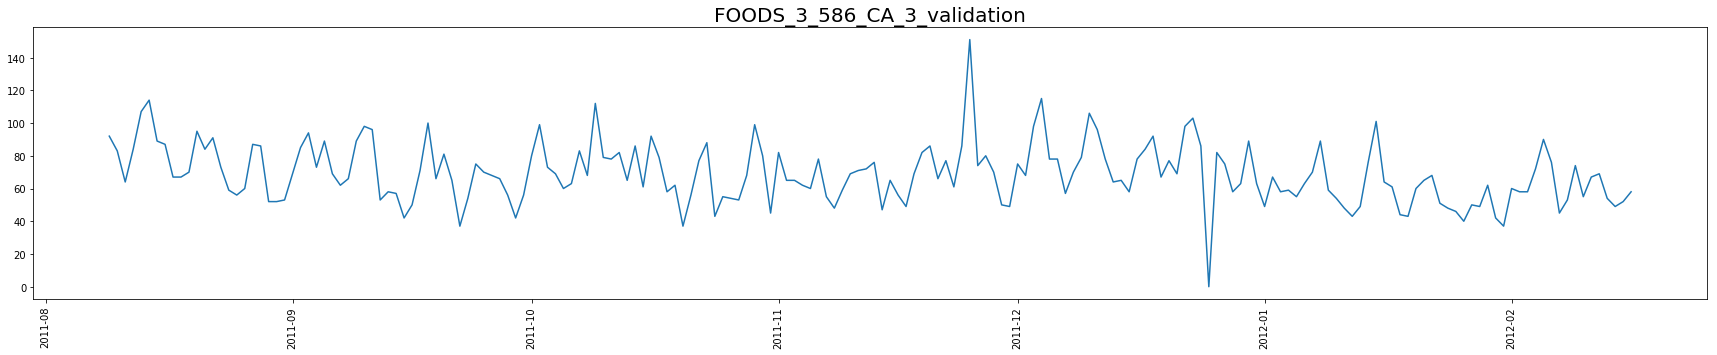

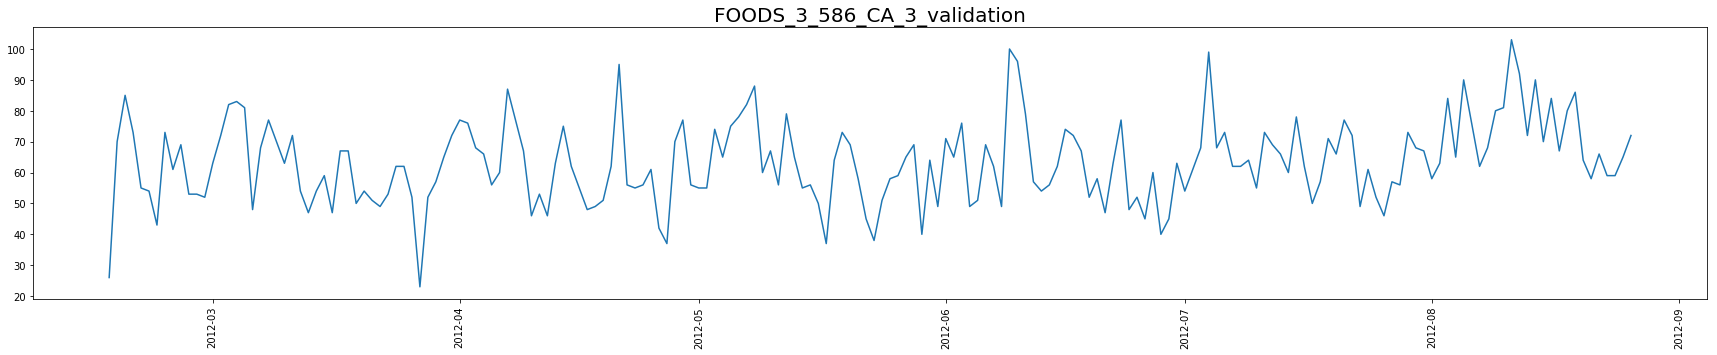

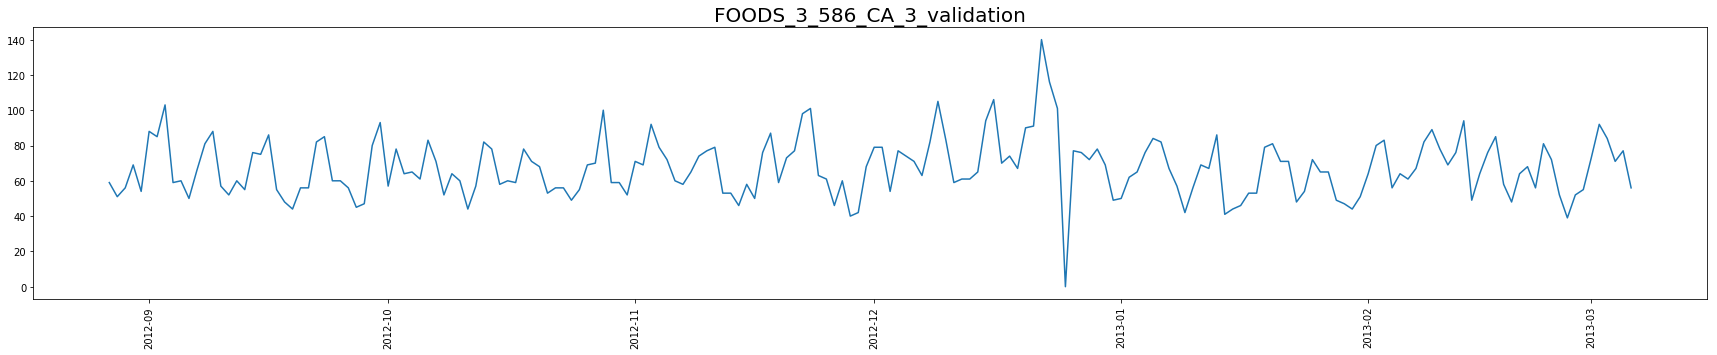

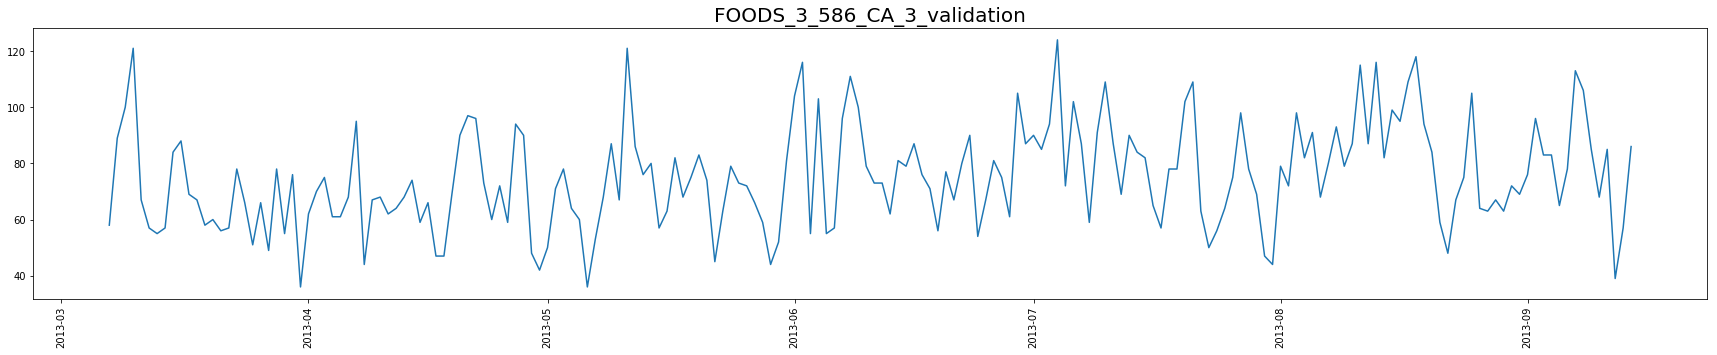

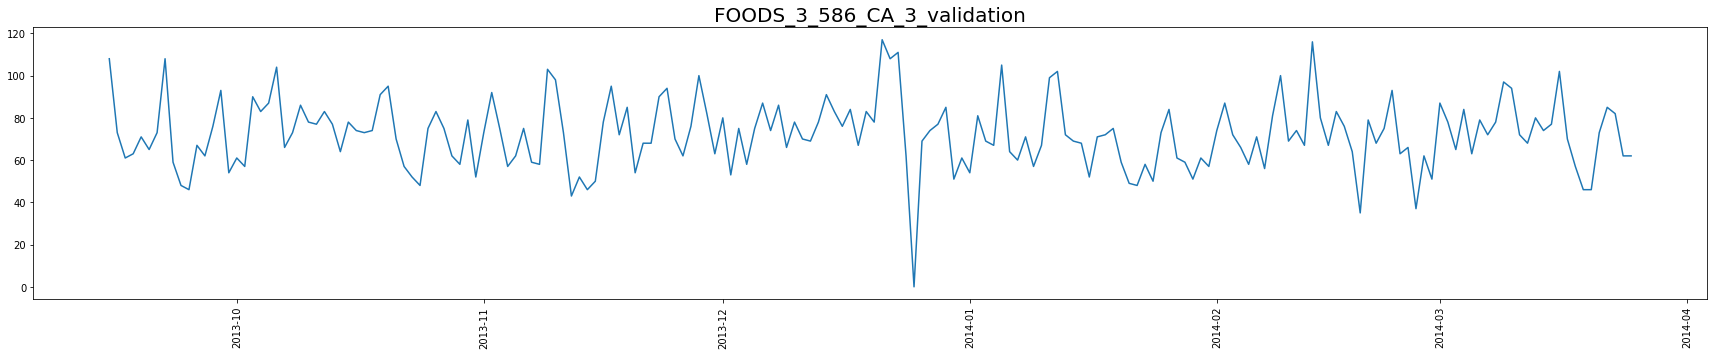

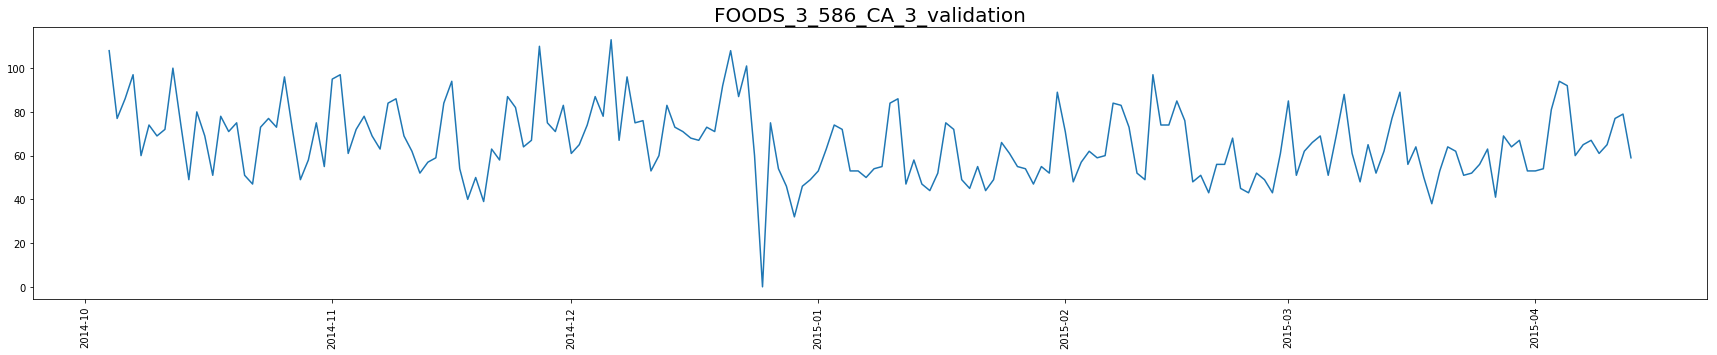

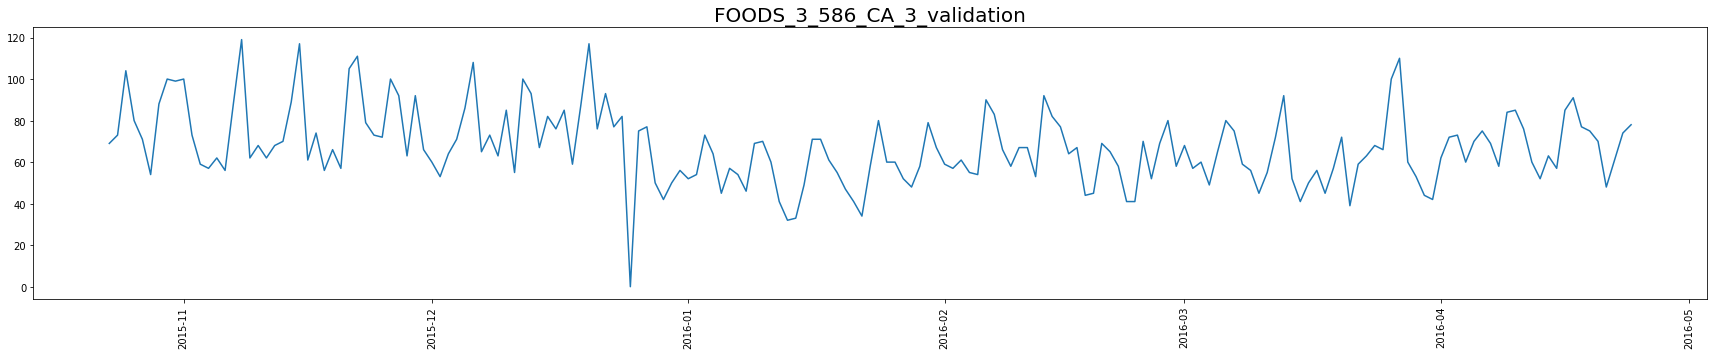

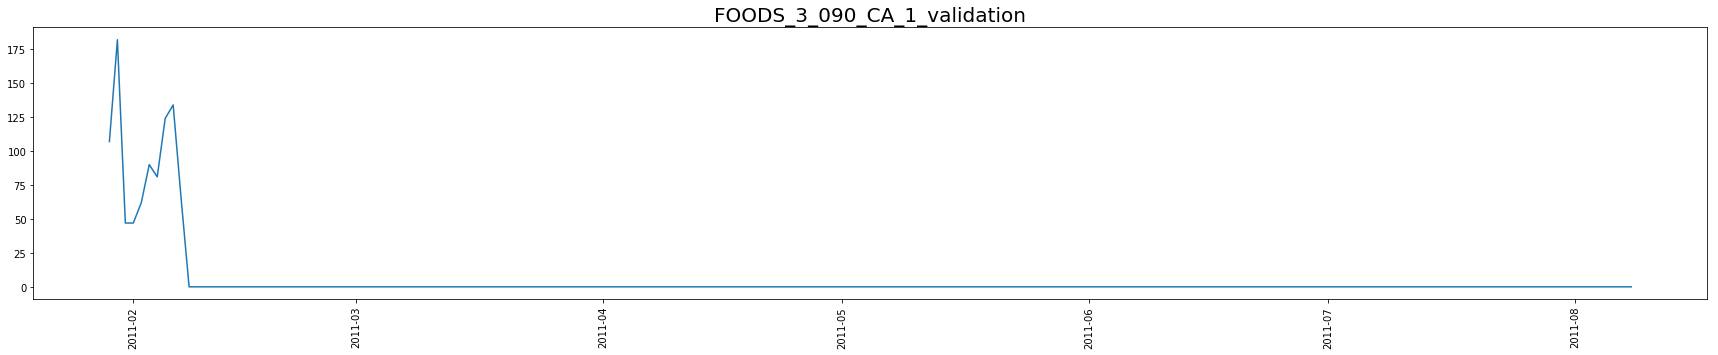

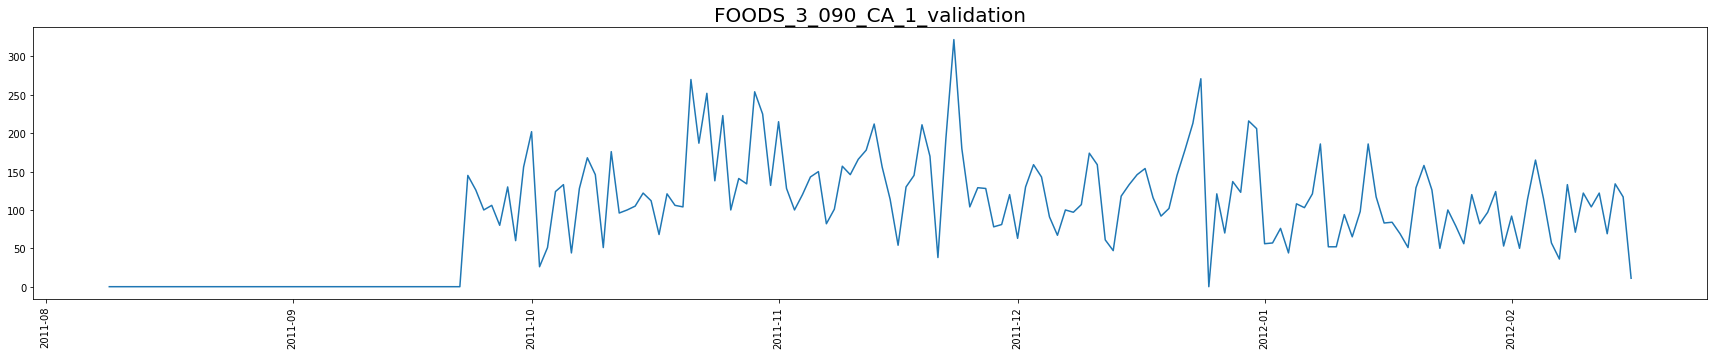

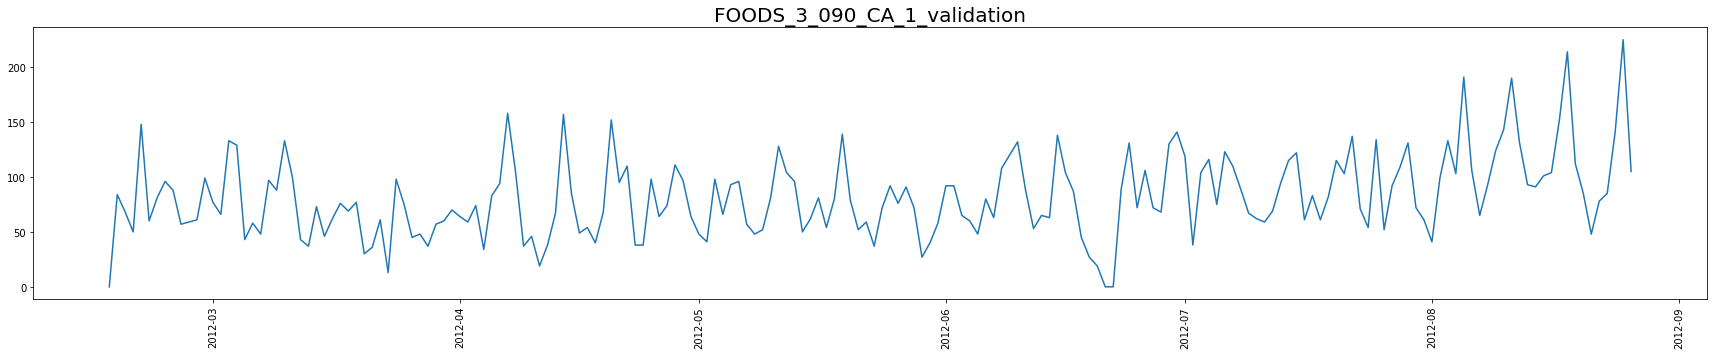

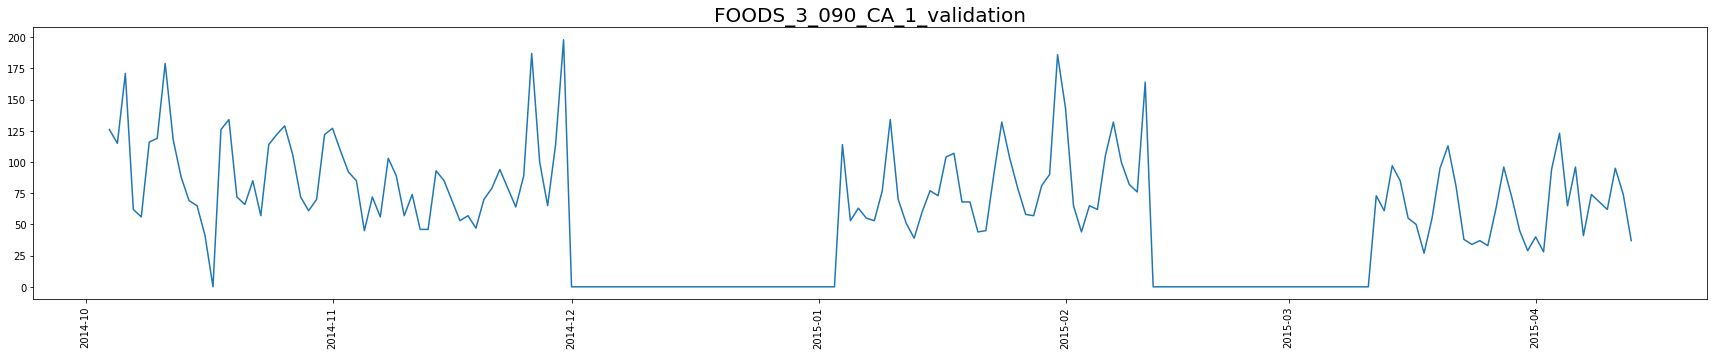

In [105]:
for col in data[cols].mean(axis=0).sort_values(ascending=False).index[:5]:
    for i in range(splitnum):
        plt.figure(figsize=(30,5))
        plt.xticks(rotation=90)
        plt.plot(data.date[a*i:a*(i+1)], data[col][a*i:a*(i+1)])
        plt.title(col, {'fontsize':20})
        plt.show()

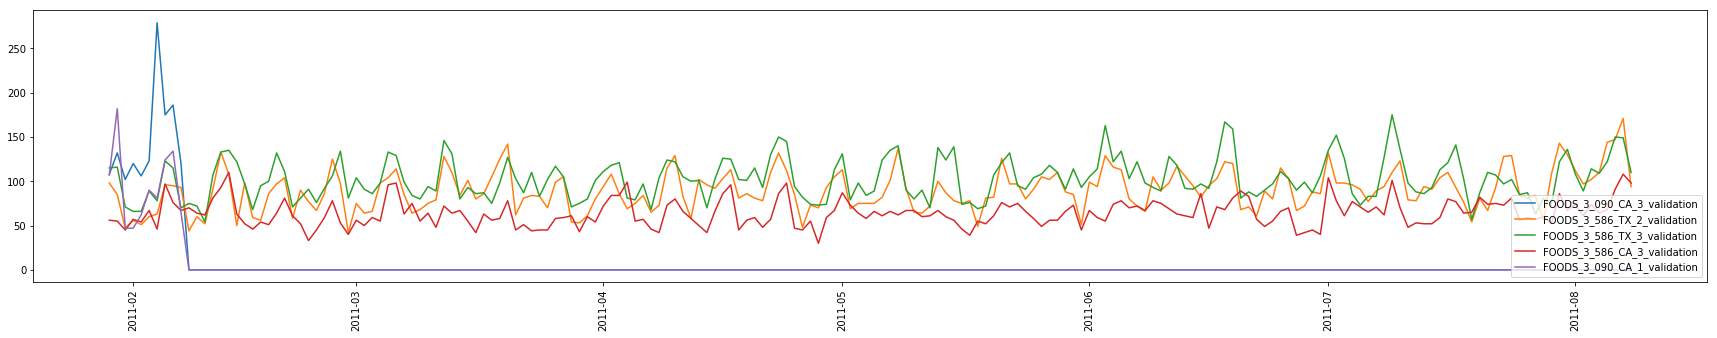

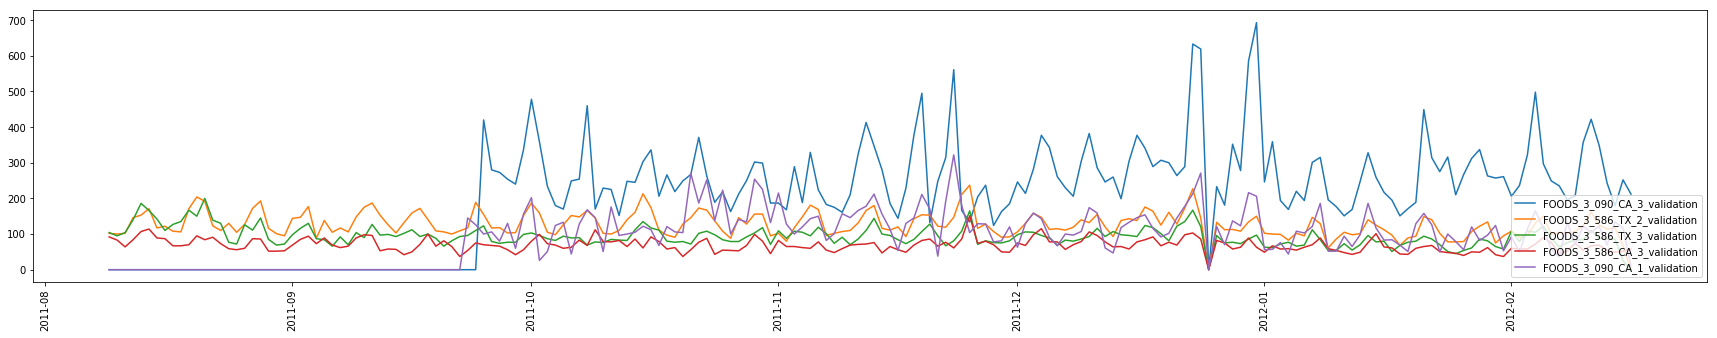

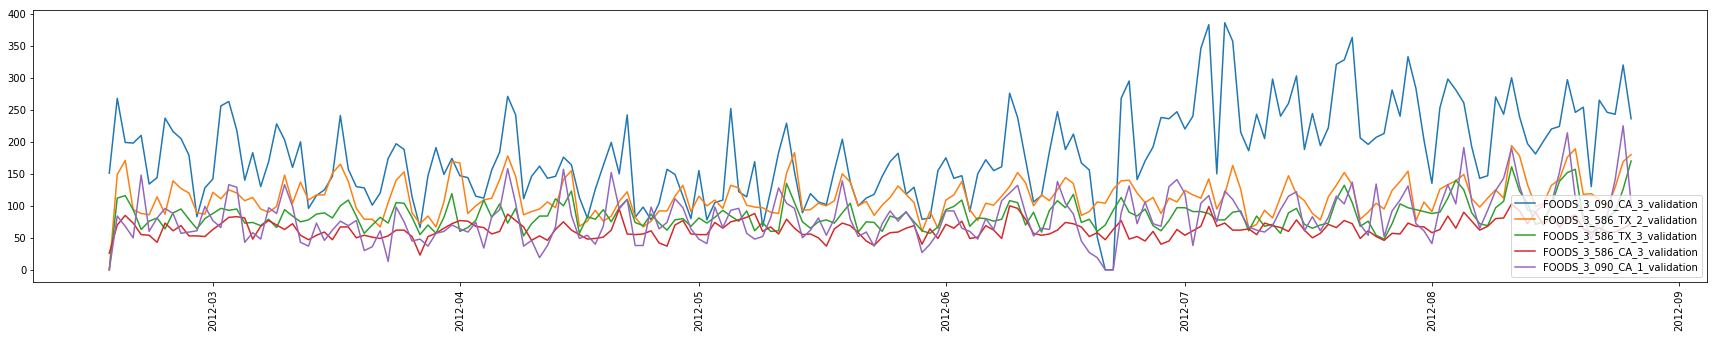

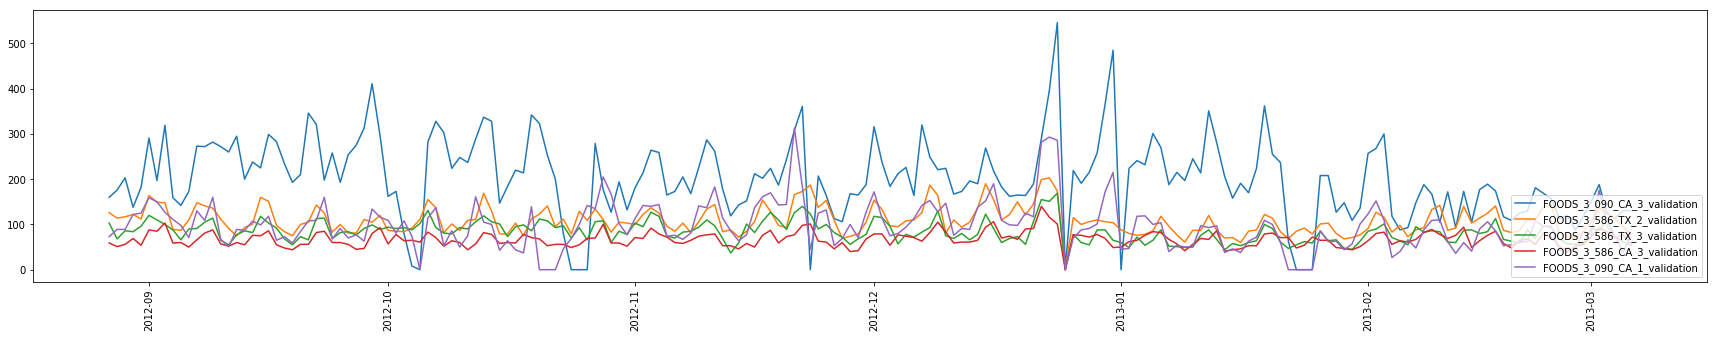

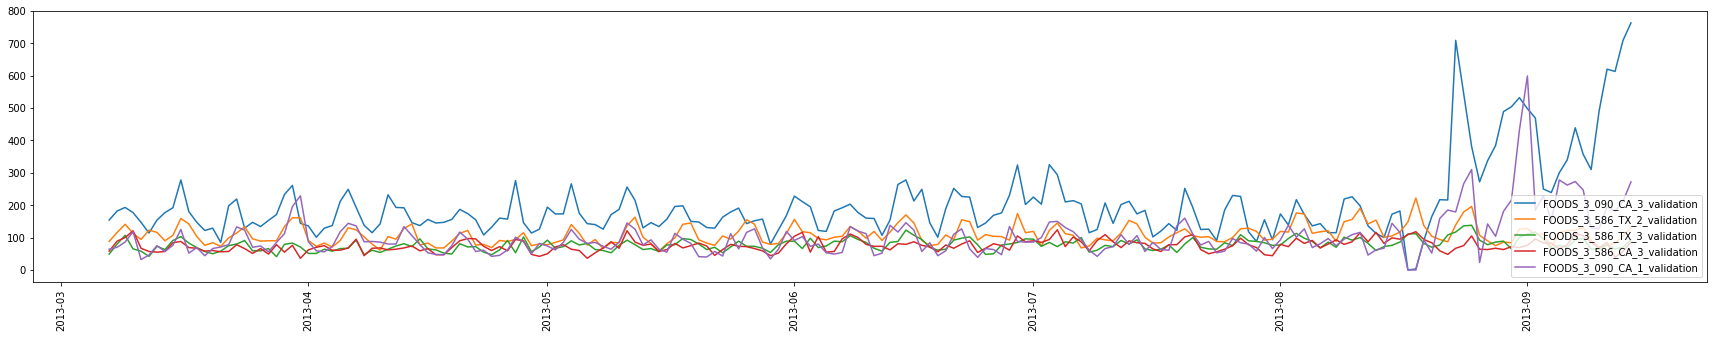

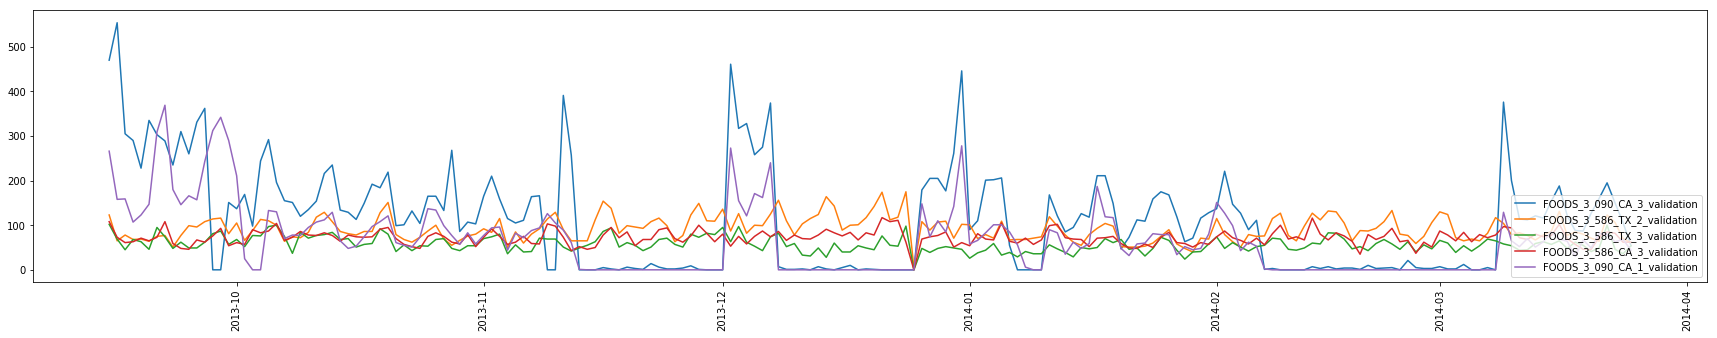

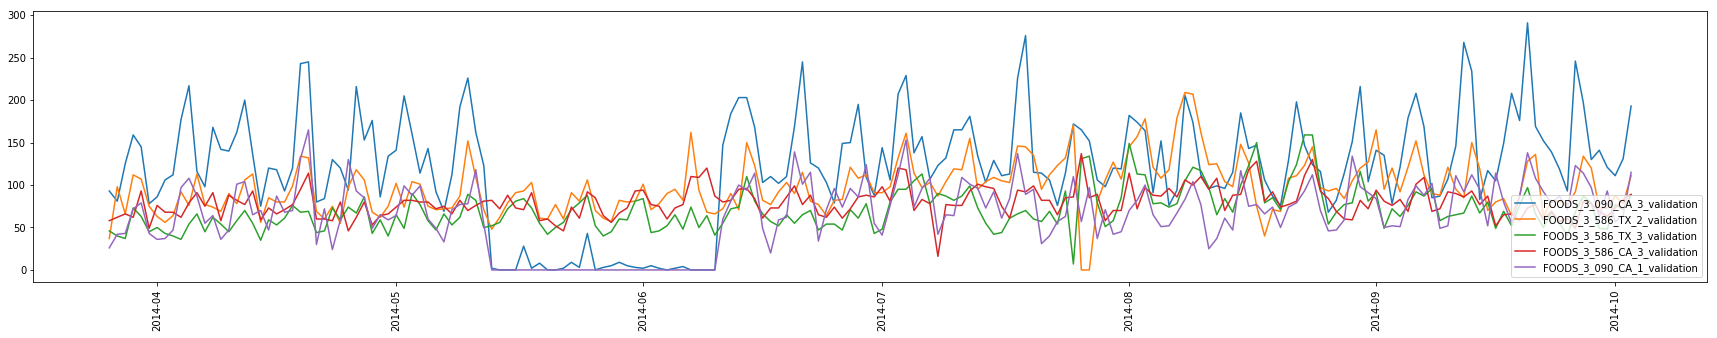

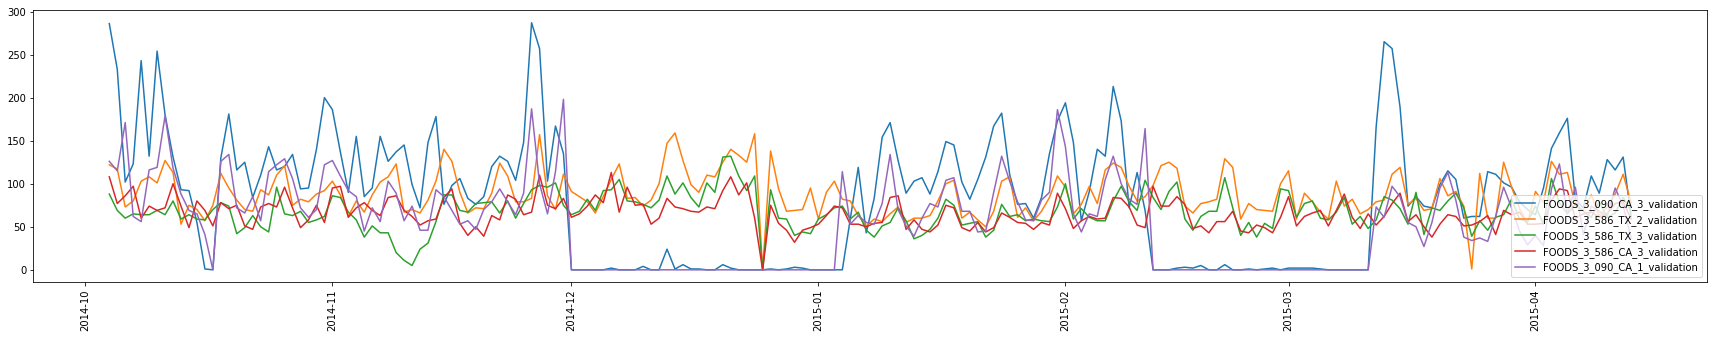

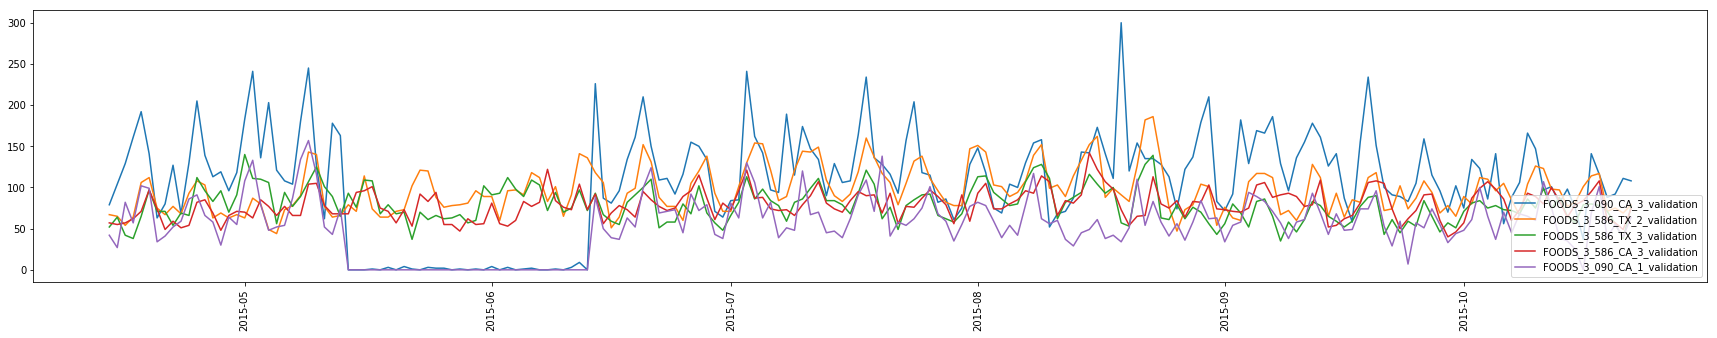

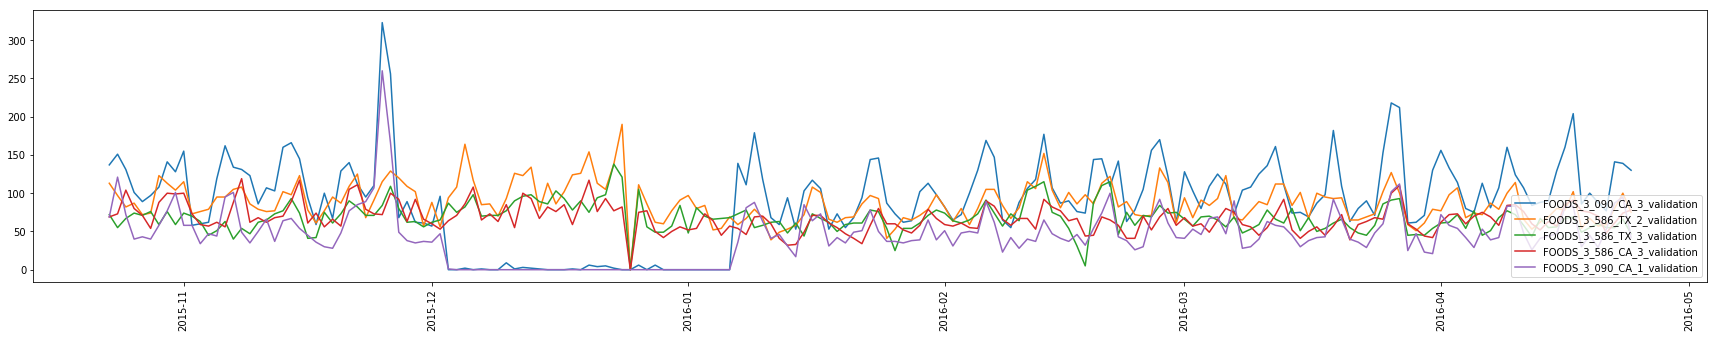

In [108]:
for i in range(splitnum):
    plt.figure(figsize=(30,5))
    plt.xticks(rotation=90)
    for col in data[cols].mean(axis=0).sort_values(ascending=False).index[:5]:
        plt.plot(data.date[a*i:a*(i+1)], data[col][a*i:a*(i+1)], label=col)
    #plt.title(col, {'fontsize':20})
    plt.legend(loc=4)
    plt.show()